In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Pandas display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
os.listdir()

# DataLoading

In [2]:
taxi_fare=pd.read_csv(r"TaxiFare.csv")
taxi_fare.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.50,2009-06-15 17:26:21 UTC,-73.84,40.72,-73.84,40.71,1
1,52:16.0,16.90,2010-01-05 16:52:16 UTC,-74.02,40.71,-73.98,40.78,1
2,35:00.0,5.70,2011-08-18 00:35:00 UTC,-73.98,40.76,-73.99,40.75,2
3,30:42.0,7.70,2012-04-21 04:30:42 UTC,-73.99,40.73,-73.99,40.76,1
4,51:00.0,5.30,2010-03-09 07:51:00 UTC,-73.97,40.77,-73.96,40.78,1


In [3]:
taxi_fare.info()     #Total 8columns, 50000 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
taxi_fare.isnull().sum().sort_values(ascending=False)

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

- **No missing value**

In [5]:
taxi_fare.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,50000.00,11.36,9.69,-5.00,6.00,8.50,12.50,200.00
longitude_of_pickup,50000.00,-72.51,10.39,-75.42,-73.99,-73.98,-73.97,40.78
latitude_of_pickup,50000.00,39.93,6.22,-74.01,40.73,40.75,40.77,401.08
longitude_of_dropoff,50000.00,-72.50,10.41,-84.65,-73.99,-73.98,-73.96,40.85
latitude_of_dropoff,50000.00,39.93,6.01,-74.01,40.73,40.75,40.77,43.42
no_of_passenger,50000.00,1.67,1.29,0.00,1.00,1.00,2.00,6.00


from the above analysis, we ca say that in a taxi  min 0 and max 6 passengers can travel. 
And the taxi fare could be variate from 3 to 200 dollars. 

# Univariate Analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


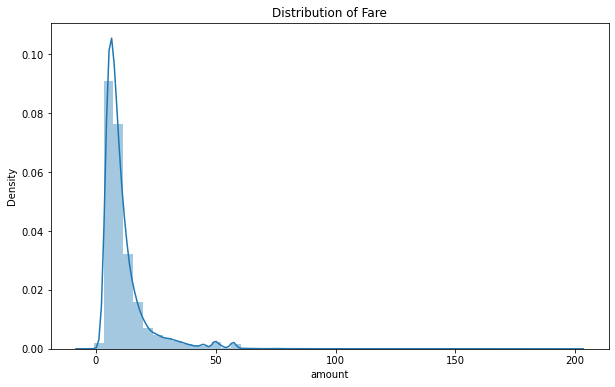

In [6]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.distplot(taxi_fare['amount']);
plt.title('Distribution of Fare');

From the above graph we can see that, amount feature is positive skewed.

In [7]:
taxi_fare.shape

(50000, 8)

In [8]:
print("There are {} rows negative in data set".format(len(taxi_fare[taxi_fare["amount"]<0])))

There are 6 rows negative in data set


In [9]:
print(f"There are {len(taxi_fare[taxi_fare['amount'] < 0])} negative fares.")
print(f"There are {len(taxi_fare[taxi_fare['amount'] == 0])} $0 fares.")
print(f"There are {len(taxi_fare[taxi_fare['amount'] > 100])} fares greater than $100.")

There are 6 negative fares.
There are 3 $0 fares.
There are 16 fares greater than $100.


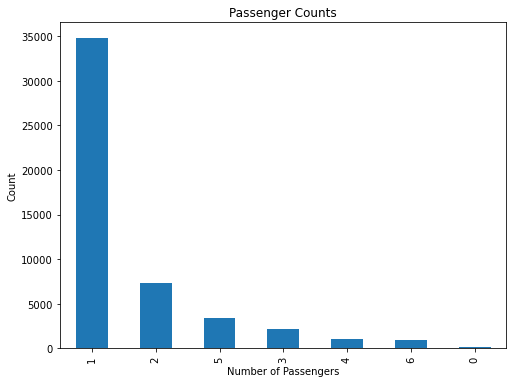

In [10]:
plt.figure(figsize=(8,6))
taxi_fare['no_of_passenger'].value_counts().plot.bar()
plt.title('Passenger Counts'); 
plt.xlabel('Number of Passengers'); 
plt.ylabel('Count');

In the given chart, most of the no. of passengers travel is of cateogry 1.

<AxesSubplot:ylabel='no_of_passenger'>

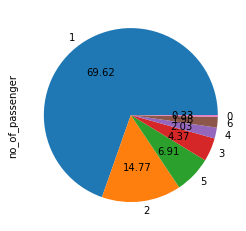

In [27]:
taxi_fare["no_of_passenger"].value_counts().plot(kind="pie", autopct="%.2f")

# Outliers, Cleaning and Engineering

In [11]:
taxi_fare.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99,1]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,50%,75%,90%,95%,96%,97%,98%,99%,100%,max
amount,50000.00,11.36,9.69,-5.00,3.30,3.50,3.70,4.00,4.10,4.50,...,8.50,12.50,20.50,30.50,33.54,38.33,46.50,52.00,200.00,200.00
longitude_of_pickup,50000.00,-72.51,10.39,-75.42,-74.01,-74.01,-74.01,-74.01,-74.01,-74.00,...,-73.98,-73.97,-73.95,-73.87,-73.86,-73.79,-73.14,0.00,40.78,40.78
latitude_of_pickup,50000.00,39.93,6.22,-74.01,0.00,40.58,40.65,40.68,40.70,40.72,...,40.75,40.77,40.78,40.79,40.79,40.79,40.80,40.81,401.08,401.08
longitude_of_dropoff,50000.00,-72.50,10.41,-84.65,-74.02,-74.01,-74.01,-74.01,-74.01,-74.00,...,-73.98,-73.96,-73.94,-73.87,-73.86,-73.80,-73.42,0.00,40.85,40.85
latitude_of_dropoff,50000.00,39.93,6.01,-74.01,0.00,40.56,40.65,40.67,40.69,40.71,...,40.75,40.77,40.78,40.79,40.80,40.80,40.81,40.83,43.42,43.42
no_of_passenger,50000.00,1.67,1.29,0.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,2.00,4.00,5.00,5.00,5.00,5.00,6.00,6.00,6.00


- After analysing the statistics there are outliers present in the dataset. These datapopints will prevent model running efficiently. So,better to cap these outliers.

- First check the no. of observations present in the given dataset

In [3]:
len(taxi_fare[taxi_fare["amount"]>52]) , len(taxi_fare[taxi_fare["amount"]<= 3])


(498, 415)

In [37]:
len(taxi_fare[taxi_fare['no_of_passenger'] < 1]) , len(taxi_fare[taxi_fare['no_of_passenger'] == 6])

(165, 989)

- **Minimum amount is -5**
- **rows with amount <= 3 is 415 , and amount >52 is 498**
- **rows with no.passengers ==0 is 165, that could be possible for some reasons**
- **rows with no.passengers >=6 is 989, this could be also possible for some cases**

## Outliers Capping

In [12]:
taxi_fare["amount"]=np.where(taxi_fare["amount"]>=52,52,taxi_fare["amount"])
taxi_fare["amount"]=np.where(taxi_fare["amount"]<=3,3,taxi_fare["amount"])
taxi_fare["no_of_passenger"]=np.where(taxi_fare["no_of_passenger"]>4,4,taxi_fare["no_of_passenger"])

In [13]:
taxi_fare.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99,1]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,50%,75%,90%,95%,96%,97%,98%,99%,100%,max
amount,50000.00,11.26,8.97,3.00,3.30,3.50,3.70,4.00,4.10,4.50,...,8.50,12.50,20.50,30.50,33.54,38.33,46.50,52.00,52.00,52.00
longitude_of_pickup,50000.00,-72.51,10.39,-75.42,-74.01,-74.01,-74.01,-74.01,-74.01,-74.00,...,-73.98,-73.97,-73.95,-73.87,-73.86,-73.79,-73.14,0.00,40.78,40.78
latitude_of_pickup,50000.00,39.93,6.22,-74.01,0.00,40.58,40.65,40.68,40.70,40.72,...,40.75,40.77,40.78,40.79,40.79,40.79,40.80,40.81,401.08,401.08
longitude_of_dropoff,50000.00,-72.50,10.41,-84.65,-74.02,-74.01,-74.01,-74.01,-74.01,-74.00,...,-73.98,-73.96,-73.94,-73.87,-73.86,-73.80,-73.42,0.00,40.85,40.85
latitude_of_dropoff,50000.00,39.93,6.01,-74.01,0.00,40.56,40.65,40.67,40.69,40.71,...,40.75,40.77,40.78,40.79,40.80,40.80,40.81,40.83,43.42,43.42
no_of_passenger,50000.00,1.56,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00


In [15]:
# created function for finding distance using minkowski formula

def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [16]:
taxi_fare['total_distance'] = minkowski_distance(taxi_fare['longitude_of_pickup'],
                                               taxi_fare['longitude_of_dropoff'],
                                               taxi_fare['latitude_of_pickup'],
                                               taxi_fare['latitude_of_dropoff'],2
                                              )

It does seem that the rides with a larger absolute difference in both longitude and latitude tend to cost more. To capture both differences in a single variable, we can add up the two differences in latitude and longitude and also find the square root of the sum of differences squared. The former feature would be called the Manhattan distance - or l1 norm - and the latter is called the Euclidean distance - or l2 norm. Both of these distances are specific examples of the general Minkowski distance.

###### Manhattan and Euclidean Distance
The Minkowski Distance between two points is expressed as:

D(X,Y)=(∑i=1n|xi−yi|p)1/p

if p = 1, then this is the Manhattan distance and if p = 2 this is the Euclidean distance. You may also see these referred to as the l1 or l2 norm where the number indicates p in the equation.

I should point out that these equations are only valid for actual distances in a cartesian coordinate system and here we only use them to find relative distances. To find the actual distances in terms of kilometers, we have to work with the latitude and longitude geographical coordinate system. This will be done later using the Haversine formula.

# Feature Enigneering 

In [17]:
taxi_fare["date_time_pickup"]=pd.to_datetime(taxi_fare["date_time_of_pickup"])
taxi_fare["pickup_day"]=taxi_fare["date_time_pickup"].dt.day_name()
taxi_fare["pickup_day_no"]=taxi_fare["date_time_pickup"].dt.weekday
taxi_fare["pickup_hour"]=taxi_fare["date_time_pickup"].dt.hour
taxi_fare["day_of_month"]=taxi_fare["date_time_pickup"].dt.day
taxi_fare["year"]=taxi_fare["date_time_pickup"].dt.year
taxi_fare["Is_it_Weekend"]=np.where(taxi_fare["pickup_day_no"].isin([5,6]),1,0)
taxi_fare["Is_Starting_month"]=np.where(taxi_fare["day_of_month"].isin(range(1,11)),1,0)
taxi_fare["Is_Mid_month"]=np.where(taxi_fare["day_of_month"].isin(range(11,21)),1,0)
taxi_fare["Is_Ending_month"]=np.where(taxi_fare["day_of_month"].isin(range(21,31)),1,0)
taxi_fare["Is_Leap"]=np.where(taxi_fare["year"]%4==0,1,0)

In [18]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'night'
    
taxi_fare["time_of_day"]=taxi_fare["pickup_hour"].apply(time_of_day)

In [49]:
taxi_fare

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,total_distance,date_time_pickup,...,pickup_day_no,pickup_hour,day_of_month,year,Is_it_Weekend,Is_Starting_month,Is_Mid_month,Is_Ending_month,Is_Leap,time_of_day
0,26:21.0,4.50,2009-06-15 17:26:21 UTC,-73.84,40.72,-73.84,40.71,1,0.01,2009-06-15 17:26:21+00:00,...,0,17,15,2009,0,0,1,0,0,Evening
1,52:16.0,16.90,2010-01-05 16:52:16 UTC,-74.02,40.71,-73.98,40.78,1,0.08,2010-01-05 16:52:16+00:00,...,1,16,5,2010,0,1,0,0,0,Evening
2,35:00.0,5.70,2011-08-18 00:35:00 UTC,-73.98,40.76,-73.99,40.75,2,0.01,2011-08-18 00:35:00+00:00,...,3,0,18,2011,0,0,1,0,0,night
3,30:42.0,7.70,2012-04-21 04:30:42 UTC,-73.99,40.73,-73.99,40.76,1,0.03,2012-04-21 04:30:42+00:00,...,5,4,21,2012,1,0,0,1,1,night
4,51:00.0,5.30,2010-03-09 07:51:00 UTC,-73.97,40.77,-73.96,40.78,1,0.02,2010-03-09 07:51:00+00:00,...,1,7,9,2010,0,1,0,0,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.00,2013-06-12 23:25:15 UTC,-74.00,40.75,-74.02,40.71,1,0.05,2013-06-12 23:25:15+00:00,...,2,23,12,2013,0,0,1,0,0,night
49996,19:18.0,7.50,2015-06-22 17:19:18 UTC,-73.98,40.77,-73.99,40.76,1,0.01,2015-06-22 17:19:18+00:00,...,0,17,22,2015,0,0,0,1,0,Evening
49997,53:00.0,6.90,2011-01-30 04:53:00 UTC,-74.00,40.74,-74.00,40.76,1,0.02,2011-01-30 04:53:00+00:00,...,6,4,30,2011,1,0,0,1,0,night
49998,09:00.0,4.50,2012-11-06 07:09:00 UTC,-73.95,40.78,-73.95,40.78,2,0.01,2012-11-06 07:09:00+00:00,...,1,7,6,2012,0,1,0,0,1,Morning


# Bivariate Analysis

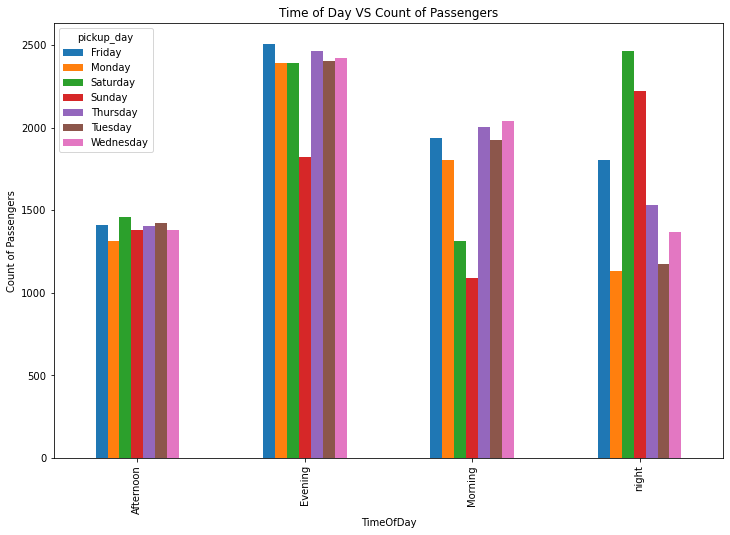

In [19]:
pp=taxi_fare.pivot_table(index="time_of_day",columns="pickup_day",values="no_of_passenger",aggfunc="count")
pp.plot(kind="bar",figsize=(12,8))
plt.title("Time of Day VS Count of Passengers")
plt.xlabel("TimeOfDay")
plt.ylabel("Count of Passengers")
plt.show()

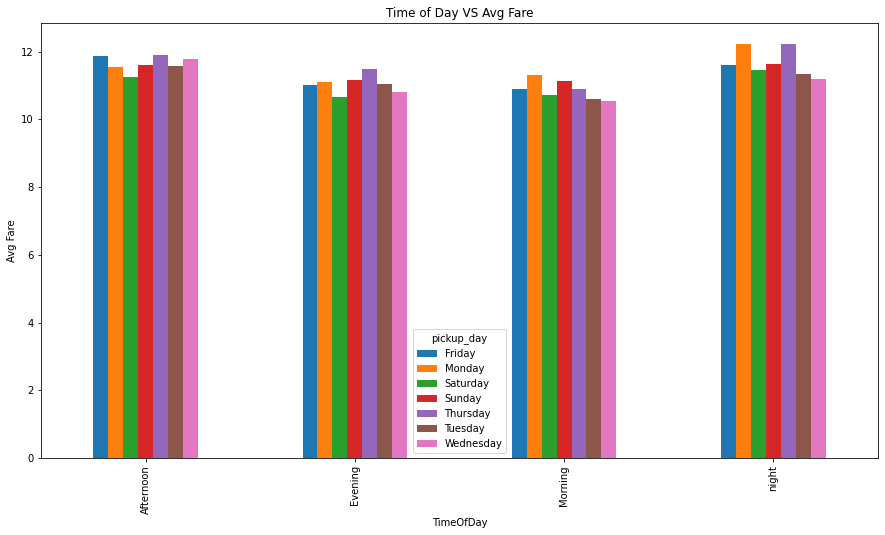

In [41]:
pp=taxi_fare.pivot_table(index="time_of_day",columns="pickup_day",values="amount",aggfunc="mean")
pp.plot(kind="bar",figsize=(15,8))
plt.title("Time of Day VS Avg Fare")
plt.xlabel("TimeOfDay")
plt.ylabel("Avg Fare")
plt.show()

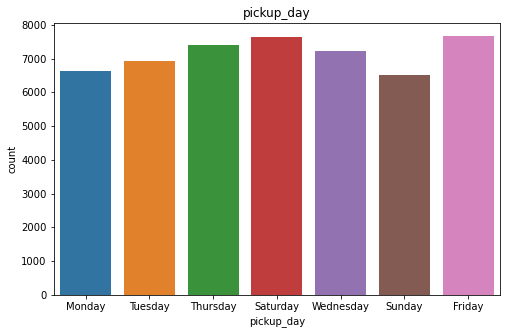

In [20]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title('pickup_day')
ax=sns.countplot(x="pickup_day",data=taxi_fare,ax=ax)

<BarContainer object of 4 artists>

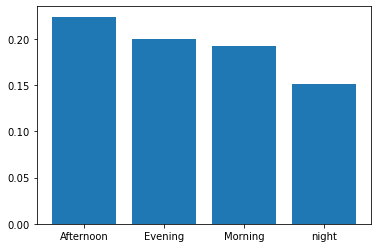

In [22]:
ab=taxi_fare.pivot_table(index="time_of_day",values="total_distance",aggfunc="mean").reset_index()
plt.bar(ab["time_of_day"],ab["total_distance"])

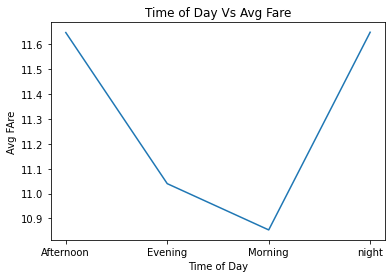

In [25]:
amount_time=taxi_fare.pivot_table(index="time_of_day",values="amount",aggfunc="mean").reset_index()
amount_time=amount_time.sort_values(by="time_of_day")
plt.plot(amount_time["time_of_day"],amount_time["amount"])
plt.title("Time of Day Vs Avg Fare")
plt.xlabel("Time of Day")
plt.ylabel("Avg FAre")
plt.show()


<AxesSubplot:xlabel='amount', ylabel='pickup_hour'>

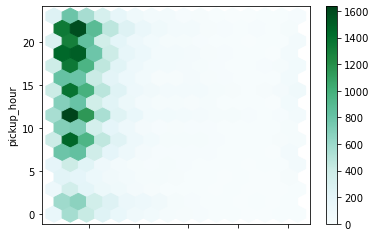

In [27]:
taxi_fare.plot.hexbin(x="amount",y="pickup_hour",gridsize=15)

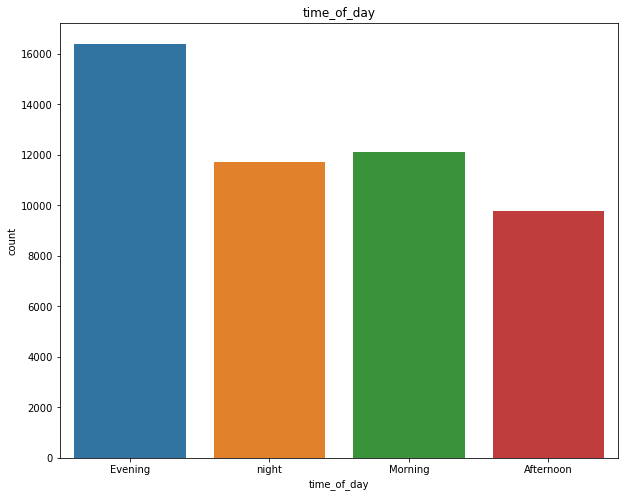

In [28]:
fig,ax=plt.subplots(figsize=(10,8))
ax.set_title("time_of_day")
ax=sns.countplot(x="time_of_day",data=taxi_fare,ax=ax)

In [79]:
taxi_fare1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   no_of_passenger       50000 non-null  int64  
 2   total_distance        50000 non-null  float64
 3   pickup_day_no         50000 non-null  int64  
 4   pickup_hour           50000 non-null  int64  
 5   day_of_month          50000 non-null  int64  
 6   year                  50000 non-null  int64  
 7   Is_it_Weekend         50000 non-null  int32  
 8   Is_Starting_month     50000 non-null  int32  
 9   Is_Mid_month          50000 non-null  int32  
 10  Is_Ending_month       50000 non-null  int32  
 11  Is_Leap               50000 non-null  int32  
 12  time_of_day_Evening   50000 non-null  uint8  
 13  time_of_day_Morning   50000 non-null  uint8  
 14  time_of_day_night     50000 non-null  uint8  
 15  pickup_day_Monday  

In [29]:
taxi_fare1 = pd.get_dummies(taxi_fare , columns=["time_of_day","pickup_day"], drop_first=True)

In [30]:
taxi_fare1.drop(columns=["unique_id","date_time_of_pickup","longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff","date_time_pickup"], axis=1,inplace= True)

In [ ]:
# SPlitting data into Independent and dependnet variables

In [31]:
y=taxi_fare1["amount"]
X=taxi_fare1.drop("amount", axis=1)

In [ ]:
#Splitting data into Train and Tst data

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=88)
rf1=RandomForestRegressor()
rf1.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
print("train accuracy is ",rf1.score(X_train,y_train))
print("test accuracy is ",rf1.score(X_test,y_test))

train accuracy is  0.9710497346714265
test accuracy is  0.7877390050311515


In [49]:
y_train.describe().T

count   40000.00
mean       11.25
std         8.97
min         3.00
25%         6.00
50%         8.50
75%        12.50
max        52.00
Name: amount, dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={
"n_estimators":[20,50],
"criterion":["mse"],
"max_depth":[3,5,6,7],
#"min_samples_split":[2,4,6],
#"min_samples_leaf":[2,4,6]
}
rf2=RandomForestRegressor()
rf_gs=GridSearchCV(estimator=rf2,param_grid=parameters,scoring="accuracy",cv=10,verbose=1)
rf_gs.fit(X_train,y_train)

In [ ]:
rf_gs.best_params_

In [50]:
rff=RandomForestRegressor(criterion= 'mse', max_depth= 6, n_estimators= 20)
rff.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=20)

In [51]:
rff.score(X_train,y_train)

0.818922447026035

In [52]:
rff.score(X_test,y_test)

0.7962994275573739

In [53]:
y_train_pred=rff.predict(X_train)
y_test_pred=rff.predict(X_test)

In [54]:
print("RMSE of Train: ", np.sqrt(np.mean((y_train-y_train_pred)**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-y_test_pred)**2) ))

RMSE of Train:  3.8154112934965285
RMSE of Test:  4.063390529259363


In [55]:
print("MAE of Train: ", np.mean(np.abs(y_train-y_train_pred)) )
print("MAE of Test: ", np.mean(np.abs(y_test-y_test_pred)) )

MAE of Train:  2.0996037662220397
MAE of Test:  2.153558048708826


In [56]:
print("R^2 is train: ", rff.score(X_train, y_train))
print("R^2 is test: ", rff.score(X_test, y_test))

R^2 is train:  0.818922447026035
R^2 is test:  0.7962994275573739
